<a href="https://colab.research.google.com/github/FrumsM/Digit-Recognizer/blob/main/Digits_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

**The project is based on participating in a Kaggle competition:** https://www.kaggle.com/competitions/digit-recognizer/overview

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

The goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

To achieve this objective, I developed an 9-layer Sequential Convolutional Neural Network. I opted to use the Keras API with the TensorFlow backend, which offers an intuitive approach. Initially, I preprocessed the data, consisting of handwritten digit images, and concentrated on constructing and evaluating the CNN model.

Description of datasets:

* df_train: training dataset;

* df_test: test dataset;

* submission: sample submission file in the correct format.

Mertic: Accuracy



# Import libraries

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import *
from sklearn.model_selection import train_test_split
from PIL import Image

from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.optimizers import Adam
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.np_utils import to_categorical
from kerastuner.tuners import RandomSearch

# Load the data

In [ ]:
drive.mount('/content/drive')
path1 = '/content/drive/My Drive/Datasets/digit_test.csv'
path2 = '/content/drive/My Drive/Datasets/digit_train.csv'
path3 = '/content/drive/My Drive/Datasets/digit_sample_submission.csv'
df_test = pd.read_csv(path1)
df_train = pd.read_csv(path2)
submission = pd.read_csv(path3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train.sample(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
41471,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21886,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14650,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
907,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.sample(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3852,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
submission.sample(5)

,ImageId,Label
27963,27964,0
16977,16978,0
2149,2150,0
787,788,0
17347,17348,0


The shape of datasets:

In [ ]:
print("df_train shape: ", df_train.shape)
print("df_test shape: ", df_test.shape)
print("submission shape: ",submission.shape)

df_train shape:  (42000, 785)
df_test shape:  (28000, 784)
submission shape:  (28000, 2)


Label Distribution:

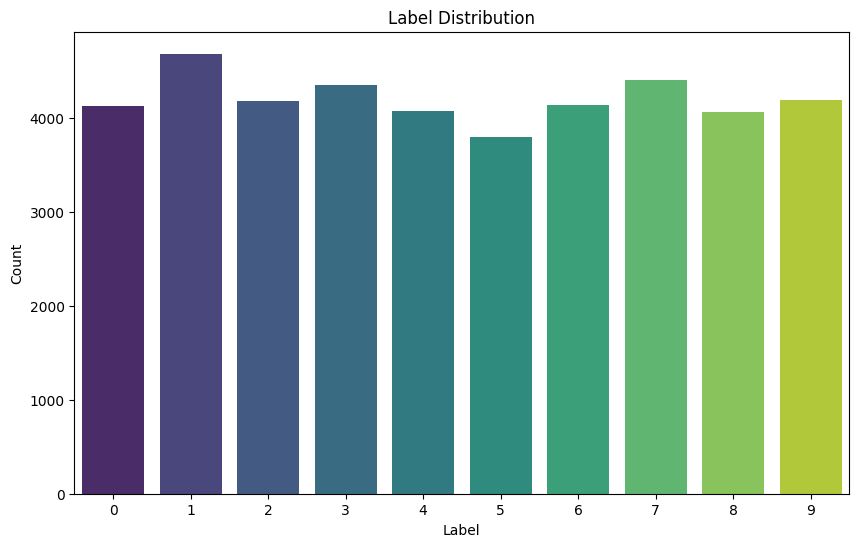

In [ ]:
label_counts = df_train['label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

# Data preparation

In [ ]:
X = df_train.drop(columns = ['label'],axis = 1).values
y = df_train['label'].values

Data normalization:

In [ ]:
X = X / 255.0
df_test = df_test / 255.0
print("X Shape: ",X.shape)
print("Test Shape: ",df_test.shape)

X Shape:  (42000, 784)
Test Shape:  (28000, 784)


Reshaping image in 3 dimensions (height = 28px, width = 28px , canal = 1):

In [ ]:
X = X.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)
print("X shape: ",X.shape)
print("test shape: ",df_test.shape)

X shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


Sample images:

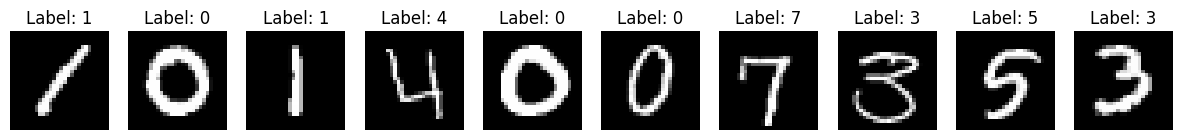

In [ ]:
image_num = 10

plt.figure(figsize=(15, 3))

for i in range(image_num):
    plt.subplot(1, image_num, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.title('Label: {}'.format(df_train['label'].values[i]))
    plt.axis('off')

plt.show()

Encoding labels to one hot vectors:

In [ ]:
y = to_categorical(y, num_classes = 10)

Spliting the train data:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42, test_size = 0.25)

In [ ]:
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (31500, 28, 28, 1)
x_test shape (10500, 28, 28, 1)
y_train shape (31500, 10)
y_test shape (10500, 10)


# Modeling

**I used the Keras Sequential which structure looks as follows:**

1 Input Layers:

* Conv2D layer with 5x5 kernel filters and ReLU activation function.
* MaxPooling2D layer with a pooling size of 2x2.

2 Hidden Layers:

* Conv2D layer with 3x3 kernel filters and ReLU activation function.
* MaxPooling2D layer with a pooling size of 2x2.
* Dropout layer, which randomly deactivates neurons with a specified dropout rate (dropout_rate hyperparameter).

3 Data Transformation:

* Flatten layer, which converts data from 2D arrays to 1D arrays.

4 Fully Connected Layers:

* Dense layer with a specified number of neurons (dense_units hyperparameter) and ReLU activation function.
* Dropout layer, which randomly deactivates neurons with a specified dropout rate (dense_dropout_rate hyperparameter).

5 Output Layer:

* Dense layer with 10 neurons (corresponding to the number of classes) and Softmax activation function, used for classification.


The hyperparameters (conv1_filters, conv2_filters, dropout_rate, dense_units, dense_dropout_rate) determine the number of filters and neurons in the convolutional and fully connected layers, as well as the probability coefficient for the Dropout layers, which help prevent overfitting of the model









Setting the CNN model:

In [ ]:
def build_model(hp):
    model = Sequential()

    model.add(Conv2D(hp.Int('conv1_filters', min_value=16, max_value=128, step=16), (5, 5), input_shape=(X_train.shape[1], X_train.shape[2], 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(hp.Int('conv2_filters', min_value=16, max_value=128, step=16), (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Flatten())

    model.add(Dense(hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dense_dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # The number of trial combinations of hyperparameters
    executions_per_trial=3,  # The number of runs for each trial combination
)

In [ ]:
tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)

Trial 5 Complete [00h 39m 44s]
val_accuracy: 0.9917142788569132

Best val_accuracy So Far: 0.9917142788569132
Total elapsed time: 02h 39m 58s


The best model hyperparameters:

In [ ]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print(best_hyperparameters.values)

{'conv1_filters': 64, 'conv2_filters': 128, 'dropout_rate': 0.2, 'dense_units': 256, 'dense_dropout_rate': 0.4}


Training the best model with a larger number of epochs:

In [ ]:
best_model = tuner.hypermodel.build(best_hyperparameters)
best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=200)

Epoch 1/50
158/158 [==============================] - 117s 740ms/step - loss: 0.3188 - accuracy: 0.9019 - val_loss: 0.0760 - val_accuracy: 0.9757
Epoch 2/50
158/158 [==============================] - 81s 512ms/step - loss: 0.0802 - accuracy: 0.9758 - val_loss: 0.0485 - val_accuracy: 0.9852
Epoch 3/50
158/158 [==============================] - 81s 516ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0391 - val_accuracy: 0.9873
Epoch 4/50
158/158 [==============================] - 78s 492ms/step - loss: 0.0433 - accuracy: 0.9869 - val_loss: 0.0372 - val_accuracy: 0.9886
Epoch 5/50
158/158 [==============================] - 79s 498ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0417 - val_accuracy: 0.9873
Epoch 6/50
158/158 [==============================] - 84s 532ms/step - loss: 0.0316 - accuracy: 0.9899 - val_loss: 0.0310 - val_accuracy: 0.9903
Epoch 7/50
158/158 [==============================] - 78s 494ms/step - loss: 0.0275 - accuracy: 0.9910 - val_loss: 0.0291 - val_a

Best model summary:

In [ ]:
best_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 64)        1664      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 128)         0         
                                                                 
 flatten_1 (Flatten)         (None, 3200)             

In [ ]:
best_test_loss, best_test_accuracy = best_model.evaluate(X_test, y_test)

329/329 [==============================] - 8s 24ms/step - loss: 0.0385 - accuracy: 0.9932


The best model accuracy:

In [ ]:
print("Test Accuracy: {:.2f}%".format(best_test_accuracy * 100))
print("Test Loss: {:.2f}%".format(best_test_loss * 100))

Test Accuracy: 99.32%
Test Loss: 3.85%


**The accuracy increased by 0.15%**

Saving the model:

In [ ]:
best_model.save('digits_recognizer.h5')

Model architecture:

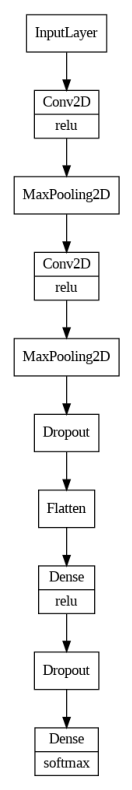

In [ ]:
plt.figure(figsize=(15, 10))

plot_model(best_model,to_file="model_structure.png", show_layer_names=False,show_layer_activations=True)

plt.imshow(plt.imread("model_structure.png"))
plt.axis('off')
plt.show()

 Confusion matrix of the validation results:

In [ ]:
predictions = best_model.predict(X_test)

predicted_labels = np.argmax(predictions, axis=1)

# Converting one-hot-encoded true labels to class indices
true_labels = np.argmax(y_test, axis=1)

329/329 [==============================] - 11s 31ms/step


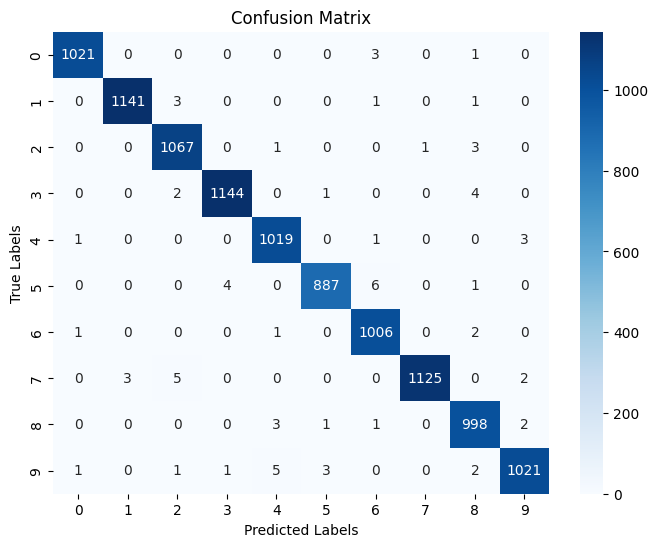

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Displaying some error results:

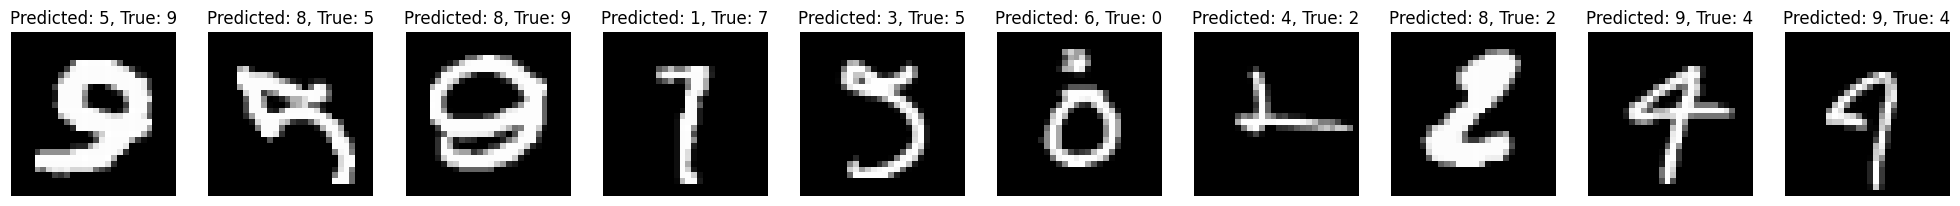

In [ ]:
incorrect_indices = [i for i in range(len(true_labels)) if true_labels[i] != predicted_labels[i]]

num_images_to_show = 10

plt.figure(figsize=(25, 10))

for i in range(num_images_to_show):
    index = incorrect_indices[i]
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_labels[index]}, True: {true_labels[index]}")
    plt.axis('off')

plt.show()

**For these 10 images, the model is performing reasonably well, except for the first two. Some errors made by the model are understandable, as even humans might find them challenging. For example, the confusion between the 9 and 4 is understandable due to their similarity, and the 4th image may appear misleading and could be mistaken for a 1**

# Test predictions

In [ ]:
predict = best_model.predict(df_test, verbose=1)
predict = np.argmax(predict, axis=1)

875/875 [==============================] - 20s 23ms/step


Predicted sample images:

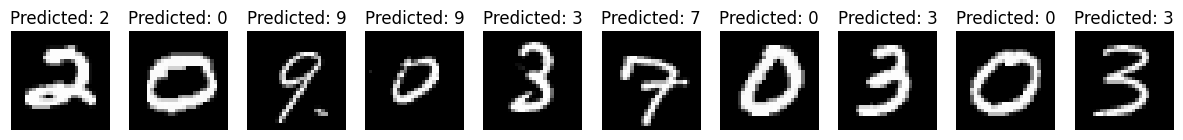

In [ ]:
num_images_to_show = 10

plt.figure(figsize=(15, 5))

for i in range(num_images_to_show):
    index = i  # Image index for output (you can change it to another number)
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(df_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predict[index]}")
    plt.axis('off')

plt.show()

**As we can observe, the model correctly predicted the digits in the training dataset, except for the 4th image**

In [ ]:
submission['Label'] = predict
submission.sample(5)

,ImageId,Label
11703,11704,7
11152,11153,2
8663,8664,8
16449,16450,5
5729,5730,1


In [ ]:
submission.to_csv('/content/drive/My Drive/digit_pred.csv', index=False)

# Conclusion

The work's goal was to accurately identify digits from a dataset of tens of thousands of handwritten images. To achieve this, I developed an 9-layer Sequential Convolutional Neural Network using Sequential model from keras + RandomSearch from keras as well.

Throughout the project, the data was preprocessed and split into training and testing sets to train and evaluate the model's performance. The CNN architecture was designed and fine-tuned.

During the training process, the model learned to recognize patterns and features in the images that are characteristic of different digits. By iteratively adjusting the weights of the neural network, the model aimed to minimize the prediction errors and improve its ability to correctly classify digits.

The success of the project was evaluated using accuracy. The final model was expected to achieve high accuracy on unseen data, demonstrating its capability to generalize well beyond the training set.

I achieved 99.32% of accuracy with this CNN trained in about 2h, took the 289/1633 place and made it to the top 18%




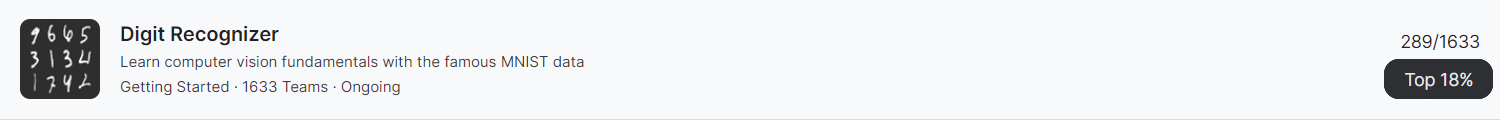